# Import Libraries and load dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv("Global Restaurants Data.csv")



# Top 5 restaurants by rating

In [13]:
top_rated = data.sort_values(by="Rating", ascending=False).head(5)

top_rated = top_rated[["RestaurantName", "City", "Rating"]].reset_index(drop=True)
top_rated.index = top_rated.index + 1
top_rated

,RestaurantName,City,Rating
1,Caterspoint,Gurgaon,4.9
2,AB's Absolute Barbecues,Dubai,4.9
3,McGuire's Irish Pub & Brewery,Pensacola,4.9
4,Miann,Auckland,4.9
5,Milse,Auckland,4.9


# 5 most expensive restaurants

,RestaurantName,City,Average_Cost_for_two,Rating
1,Satoo - Hotel Shangri-La,Jakarta,800000,4.6
2,Skye,Jakarta,800000,4.1
3,Sushi Masa,Jakarta,500000,4.9
4,3 Wise Monkeys,Jakarta,450000,4.2
5,Avec Moi Restaurant and Bar,Jakarta,350000,4.3


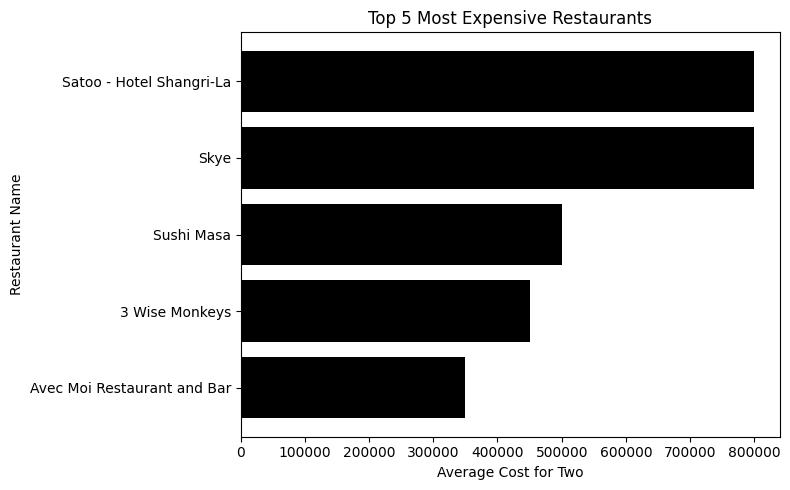

In [14]:
most_expensive = data.sort_values(by="Average_Cost_for_two", ascending=False).head(5)
most_expensive=most_expensive[["RestaurantName", "City", "Average_Cost_for_two", "Rating"]].reset_index(drop=True)
most_expensive.index = most_expensive.index + 1
display(most_expensive)

plt.figure(figsize=(8,5))
plt.barh(most_expensive["RestaurantName"], most_expensive["Average_Cost_for_two"], color="black")
plt.xlabel("Average Cost for Two")
plt.ylabel("Restaurant Name")
plt.title("Top 5 Most Expensive Restaurants")
plt.gca().invert_yaxis()  # show the most expensive at the top
plt.tight_layout()
plt.show()

# Number of restaurants per city

,City,Num_Restaurants
1,New Delhi,5473
2,Gurgaon,1118
3,Noida,1080
4,Faridabad,251
5,Ghaziabad,25


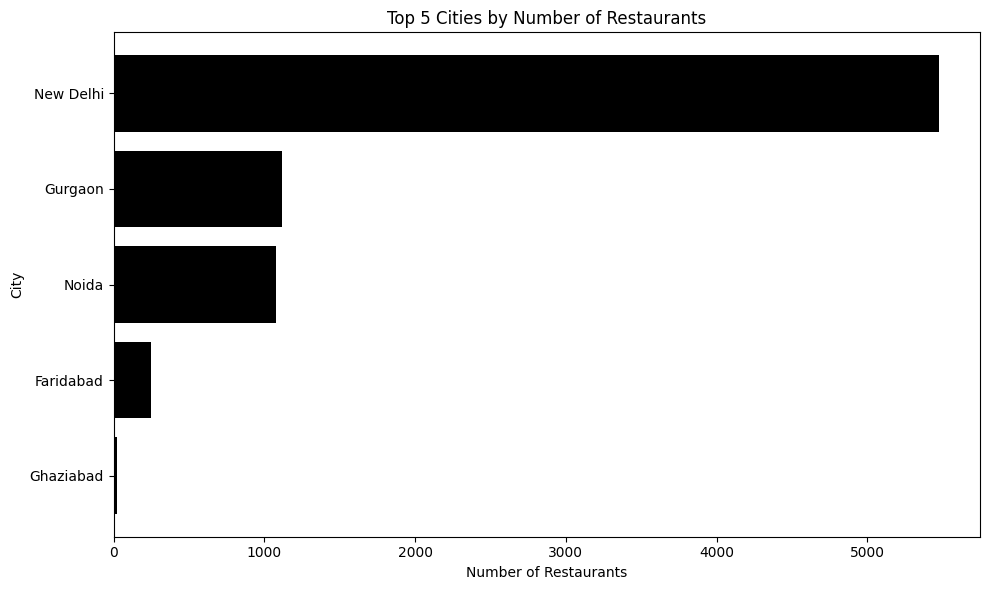

In [15]:
city_stats = data.groupby("City").agg({
    "RestaurantID": "count",           # Number of restaurants
}).reset_index()


city_stats.columns = ["City", "Num_Restaurants"]


city_stats_sorted = city_stats.sort_values(by="Num_Restaurants", ascending=False)

city_stats_sorted = city_stats_sorted.reset_index(drop=True)

city_stats_sorted.index = city_stats_sorted.index + 1

top_cities = city_stats_sorted.head(5)
display(top_cities) 

plt.figure(figsize=(10,6))
plt.barh(top_cities["City"], top_cities["Num_Restaurants"], color="black")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top 5 Cities by Number of Restaurants")
plt.gca().invert_yaxis()  # largest on top
plt.tight_layout()
plt.show()


# Top 5 most common cuisines

         Cuisine  Count
0   North Indian   2992
1        Chinese   1880
2      Fast Food   1314
3   North Indian    968
4        Chinese    855


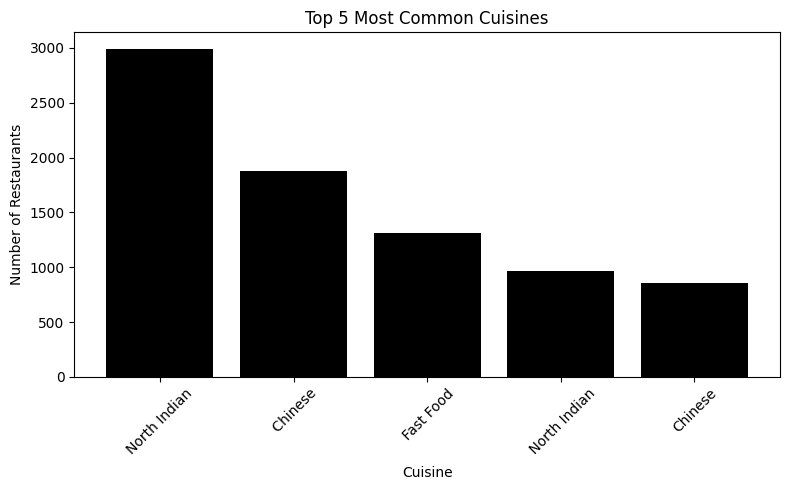

In [16]:
cuisine_counts = data["Cuisines"].str.split("|").explode().value_counts()

top_cuisines = cuisine_counts.head(5)

top_cuisines = top_cuisines.reset_index()
top_cuisines.columns = ["Cuisine", "Count"]
print(top_cuisines)
# Plot
plt.figure(figsize=(8,5))
plt.bar(top_cuisines["Cuisine"], top_cuisines["Count"], color="black")
plt.title("Top 5 Most Common Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()